# **Learning Outcomes of This Assignment:**

---
Learn to model the entire problem by analyzing and inspecting
* Learn to use docker image
* Learn to install and use Apache Spark in docker image and manual
* Learn to use beautiful soup
* Learn to use Scrapping of webiste
* Learn to understand and apply Data Analystics on five different business problems
* Understand the Command line for parallel programming
* Understand the modeling of Spark
* Understand the MLlib
* Understand the Data Modeling 
* Understand database with scheme
* Learn to cleanse, normalize, shard, spark for query mapping
* Lean to use Data frame of Spark
* Learn to work on substantial real-world big data ;
* Understand the data cleansing processes by writing PYTHON scripts
* Understand how Visualize the data to translate information into a visual context
(Matplotlib)
* Use an appropriate tool to query and drive insights from data e.g.
Relational Db with Dataframes.
* Improve reporting of data analysis


# **2. Problems Encounters:**

---


* Really difficult to implement Firebase integration with python
* Difficult to handle rough scrapped data
* First attempt on Docker spark
* Unseen Commands
* Understating of MLib working
* Spark SQL Data frame working
* Unavailability of core libraires of python in sprak docker image
* Handling of a lot of empty values
* Plotting issues with continuous data


# **3. Solution to Problems Encounters:**


---


* Install the docker and import spark image
* Read the articles and implement some pilot examples
* Read the articles and implement some pilot examples
* Read the articles and implement some pilot examples
* Solve basic word count and average problem first and the move to the real problem
* Use the basic python and develop all the logic by myself
* Replace the Nonempty values with Nan
* Delete the Nan values for plotting
* Apply pivot, histogram, and binning logic to solve this problem

#Introduction


---

In **Big Data Analytics** Assignment, we are assigned to perform multiple tasks. We want to build a system to help property investors, buyers, sellers, and zameen.com
company. Our system will help to analyze and decide whether he should buy or sell a
property in a particular location.

DATASET : Zameen.com.





#Installing and importing libraries

In [ ]:
!pip install firebase
!pip install python_jwt 
!pip install gcloud
!pip install sseclient
!pip install Crypto
!pip install pycryptodome
! pip install requests_toolbelt

#Task # 01 : Scraping

---
We are assigned to scrape data from any link from bunch of given links of zameen.com website. Our data must be more than 300 rows. 
we extracted more than 10K rows for better analysis.



In [ ]:
#importing relevent libraries.
import requests
import re
import math
from bs4 import BeautifulSoup

##Generating Links for Scraping.



we used 4 links and then navigated upto 100 webpages from each link and extracted more links for features extraction and made a list of almost 400 links...So this is pretty enough amount of links to gather data.  **:)**  

In [ ]:

lst=[]
for x in range (1,100):
  link1="https://www.zameen.com/Flats_Apartments/Islamabad-3-1.html"
  link2="https://www.zameen.com/Houses_Property/Islamabad-3-1.html"
  link3="https://www.zameen.com/Rentals_Houses_Property/Islamabad-3-1.html"
  link4="https://www.zameen.com/Rentals_Flats_Apartments/Islamabad-3-1.html"
  link1 = link1[:-6] + str(x) + link1[-6+1:]
  lst.append(link1)
  link2 = link2[:-6] + str(x) + link2[-6+1:]
  lst.append(link2)
  link3 = link3[:-6] + str(x) + link3[-6+1:]
  lst.append(link3)
  link4 = link4[:-6] + str(x) + link4[-6+1:]
  lst.append(link4)
len(lst)

396

we had choice to use whether *Selenium* or *Beautiful soup*.

We Used Beautiful Soup for scraping.

In [ ]:
pages=[]
for x in range(len(lst)):
  page = requests.get(lst[x]) #generting request for 400 links.
  soup = BeautifulSoup(page.content, 'html.parser')
  pages.append(soup)

NameError: ignored

In [ ]:

final_links=[]
for i in range (len(pages)):
  lst2=pages[i].find_all("a", class_="_7ac32433")
  for x in range(len(lst2)):
    ad_link="https://www.zameen.com"+str(lst2[x]["href"])
    final_links.append(ad_link)
len(final_links)# we get details for 10102 properties.

10102

In [ ]:
import pandas as pd
dict1 = {'links': final_links}
df = pd.DataFrame(dict1)
df.to_csv('links.csv') #saving links into CSV

##Scraping and Generting Data.

Features mentioned below that we required for insights.

property id
price
location
city
property type
area
bedrooms
baths
property name
purpose.

In [ ]:

pro_names, pro_types,pro_prices,pro_purposes,pro_locations,pro_baths,pro_beds=[],[],[],[],[],[],[] #Declaring features variables as list.
pro_cities,pro_area_names,pro_ids,pro_descriptions,pro_areas=[],[],[],[],[]
for x in final_links:
  page = requests.get(x)
  soup = BeautifulSoup(page.content, 'html.parser') 
  print(x)

  if(soup.find(class_="_64bb5b3b")!=None):
    pro_name=soup.find(class_="_64bb5b3b").getText()
    pro_type=soup.find(class_="_812aa185").getText()
    pro_price = soup.find_all('span', attrs={'aria-label':'Price'})
    pro_area = soup.find_all('span', attrs={'aria-label':'Area'})
    pro_type = soup.find_all('span', attrs={'aria-label':'Type'})
    pro_purpose = soup.find_all('span', attrs={'aria-label':'Purpose'})
    pro_location = soup.find_all('span', attrs={'aria-label':'Location'})
    pro_bath = soup.find_all('span', attrs={'aria-label':'Baths'})
    pro_bed = soup.find_all('span', attrs={'aria-label':'Beds'})

    #Standardization of price and area
    pro_price=pro_price[-1].getText()
    if('Lakh' in pro_price):
      pro_price=pro_price.replace('Lakh','')
      pro_price=pro_price.replace('PKR','')
      pro_price=str(math.ceil(float(pro_price))*100000)
    elif('Crore' in pro_price):
      pro_price=pro_price.replace('Crore','')
      pro_price=pro_price.replace('PKR','')
      pro_price=str(math.ceil(float(pro_price))*10000000)
    elif('Thousand' in pro_price):
      pro_price=pro_price.replace('Thousand','')
      pro_price=pro_price.replace('PKR','')
      pro_price=str(math.ceil(float(pro_price))*1000)
    pro_type=pro_type[-1].getText()
    pro_purpose=pro_purpose[-1].getText()
    pro_location=pro_location[-1].getText()
    pro_bath=pro_bath[-1].getText()
    pro_bed=pro_bed[-1].getText()
    pro_description=soup.find(class_="_2a806e1e").getText()
    lst=pro_location.split(',')
    pro_area_name=lst[0]
    pro_area=pro_area[-1].getText()
    if('Kanal' in pro_area):
      pro_area=pro_area.replace('Kanal','')
      pro_area=str(float(pro_area)*20)
    elif('Marla' in pro_area):
      pro_area=pro_area.replace('Marla','')
    pro_city=lst[-2]
    pro_city=pro_city.replace(' ','')
    pro_id = soup.find_all('span', attrs={'aria-label':'Link name'})
    pro_id=pro_id[-1].getText()
    pro_names.append(pro_name)
    pro_types.append(pro_type)
    pro_price=re.sub("[^0-9]", "", pro_price)
    print(pro_price)
    pro_prices.append(int(pro_price))
    pro_purposes.append(pro_purpose)
    pro_locations.append(pro_location)
    pro_baths.append(pro_bath)
    pro_beds.append(pro_bed)
    pro_cities.append(pro_city)
    pro_area_names.append(pro_area_name)
    pro_ids.append(pro_id)
    pro_descriptions.append(pro_description)
    pro_areas.append(pro_area)


#saving list in to dictionaries,
dict1 = {'Property_ID': pro_ids,'Property_Name': pro_names,'Property_Type': pro_types,'Property_Purpose': pro_purposes'Baths': pro_baths,'Bedrooms': pro_beds,'City': pro_city,
      '}
dict2 = {'Property_ID': pro_ids,'Property_Location': pro_locations,'Area':pro_areas,'City': pro_city,
      'Area_Name': pro_area_names,'Properity_Price': pro_prices}

df = pd.DataFrame(dict1) # converting dictionary into Dataframe
df.to_csv('data.csv') #creating CSV from dataframe

#Task # 02 : RDBMS

we used Firebase Realtime Database. 

# ERD

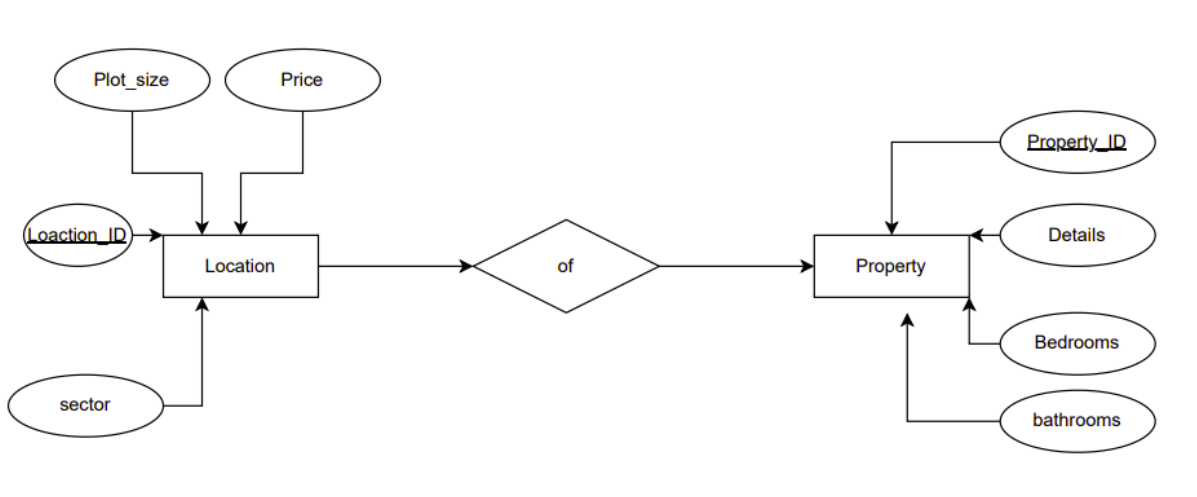

In [ ]:
from firebase import firebase
FBconn=firebase.FirebaseApplication("https://my-project-48021-default-rtdb.firebaseio.com/",None)

##loading data in to Database

In [ ]:
FBconn.post('/MyTestData',dict1) # table 1
FBconn.post('/MyTestData',dict2) # table 2
te=FBconn.get('/MyTestData/',"-N1E8ANSTPTAcmcJVRYD")
print(te)


# Task # 3 : Data Analysis with Apache Spark.

In [ ]:
def rename_col(data):
  return data.rename(columns = {'Properity ID':'Property_ID', 'Properity Name':'Property_Name', 'Properity Type':'Property_Type','Properity Purpose':'Property_Purpose','Properity Price':'Property_Price',
                     'Properity Location':'Property_Location','Area Name':'Area_Name','Beds':'Bedrooms'}, inplace = True)
  
    

In [ ]:
import pandas as pd
data2 = pd.read_csv("data (2).csv")
rename_col(data2)
data2.to_csv("data (2).csv", index=False)

In [ ]:

import csv
import math
data = pd.read_excel("dataNew.xlsx")
data = data.iloc[: , 1:]
rename_col(data)
data['Area_Name'] = data['Area_Name'].replace({'Bahria Town': 'Bahria Town Lahore'})

data.head()

,Property_ID,Property_Name,Property_Type,Property_Purpose,Property_Location,Area,Baths,Bedrooms,Area_Name,Property_Price
0,House 29068759,10 Marla Lavish House For Sale In Sector C Bah...,House,For Sale,"Bahria Town, Lahore, Punjab",10,6,5,Bahria Town Lahore,30000000
1,Flat 37105353,Semi Furnished Luxury Apartment For Sale In Iq...,Flat,For Sale,"Bahria Town, Lahore, Punjab",2.3,1,1,Bahria Town Lahore,4000000
2,House 32719002,10 Marla House For Sale In Quaid Block Bahria ...,House,For Sale,"Bahria Town, Lahore, Punjab",10,7,5,Bahria Town Lahore,30000000
3,House 36285812,25 Marla House In Bahria Town Is Available For...,House,For Sale,"Bahria Town, Lahore, Punjab",24,7,6,Bahria Town Lahore,70000000
4,Flat 36421718,510 Square Feet Flat Is Available In Bahria Town,Flat,For Sale,"Bahria Town, Lahore, Punjab",2.3,1,1,Bahria Town Lahore,6500000


In [ ]:
def round_conversion(data):
    try:
        if "Sq. Yd." in data:
            return math.ceil(int(data.split(' ')[0])*0.0330578)
    except:
        return math.ceil(data)



data["Area"] = data["Area"].apply(lambda x: round_conversion(x))

data.to_csv("dataNew.csv", index=False)

# Insight 1 Price Prediction

In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 27 kB/s 
     |████████████████████████████████| 198 kB 47.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=a8da9da6cbda54d3549f15afeb3c24a1b4b91131d834fb7aec4d9cd62194e7db
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

In [ ]:
rdd=spark.read.option('header','true').csv("data.csv",inferSchema=True)

In [ ]:
rdd.show()

+--------------+--------------------+-------------+----------------+--------------------+----+-----+--------+---------+------------------+--------------+
|   Property_ID|       Property_Name|Property_Type|Property_Purpose|   Property_Location|Area|Baths|Bedrooms|     City|         Area_Name|Property_Price|
+--------------+--------------------+-------------+----------------+--------------------+----+-----+--------+---------+------------------+--------------+
| Flat 38149482|Diplomatic Apartm...|         Flat|        For Sale|Diplomatic Enclav...|   7|    2|       2|Islamabad|Diplomatic Enclave|      40000000|
| Flat 37948454|Magnificent 2-bed...|         Flat|        For Sale|Blue Area, Islama...|   7|    3|       2|Islamabad|         Blue Area|      60000000|
| Flat 38033067|Flat is available...|         Flat|        For Sale|G-15, Islamabad, ...|  17|    4|       4|Islamabad|              G-15|      30000000|
| Flat 38033355|Flat is available...|         Flat|        For Sale|G-15, Is

In [ ]:
rdd.schema

StructType(List(StructField(Property_ID,StringType,true),StructField(Property_Name,StringType,true),StructField(Property_Type,StringType,true),StructField(Property_Purpose,StringType,true),StructField(Property_Location,StringType,true),StructField(Area,IntegerType,true),StructField(Baths,IntegerType,true),StructField(Bedrooms,StringType,true),StructField(City,StringType,true),StructField(Area_Name,StringType,true),StructField(Property_Price,IntegerType,true)))

In [ ]:
rdd=rdd.na.fill(0)
rdd=rdd.na.fill("Unknown")

In [ ]:
rdd.columns

['Property_ID',
 'Property_Name',
 'Property_Type',
 'Property_Purpose',
 'Property_Location',
 'Area',
 'Baths',
 'Bedrooms',
 'City',
 'Area_Name',
 'Property_Price']

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer

indexers = [StringIndexer(inputCol=column, outputCol=column+'_index', handleInvalid='keep').fit(rdd) for column in ["Area","Baths","Bedrooms","Property_Purpose","Property_Type","Area_Name"]]


pipeline = Pipeline(stages=indexers)
data = pipeline.fit(rdd).transform(rdd)
data.show()

+--------------+--------------------+-------------+----------------+--------------------+----+-----+--------+---------+------------------+--------------+----------+-----------+--------------+----------------------+-------------------+---------------+
|   Property_ID|       Property_Name|Property_Type|Property_Purpose|   Property_Location|Area|Baths|Bedrooms|     City|         Area_Name|Property_Price|Area_index|Baths_index|Bedrooms_index|Property_Purpose_index|Property_Type_index|Area_Name_index|
+--------------+--------------------+-------------+----------------+--------------------+----+-----+--------+---------+------------------+--------------+----------+-----------+--------------+----------------------+-------------------+---------------+
| Flat 38149482|Diplomatic Apartm...|         Flat|        For Sale|Diplomatic Enclav...|   7|    2|       2|Islamabad|Diplomatic Enclave|      40000000|       4.0|        0.0|           0.0|                   1.0|                1.0|           18

In [ ]:
cols = ("Property_ID","Property_Name","Property_Purpose","Property_Type","Property_Location","Area","Baths","Bedrooms","City","Area_Name")
data=data.drop(*cols)
data.schema

StructType(List(StructField(Property_Price,IntegerType,true),StructField(Area_index,DoubleType,false),StructField(Baths_index,DoubleType,false),StructField(Bedrooms_index,DoubleType,false),StructField(Property_Purpose_index,DoubleType,false),StructField(Property_Type_index,DoubleType,false),StructField(Area_Name_index,DoubleType,false)))

In [ ]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = data.drop("Property_Price").columns, outputCol = 'features').setHandleInvalid("keep")

data = vectorAssembler.transform(data)

In [ ]:
data.toPandas().to_csv('mycsv.csv')

In [ ]:
train, test= data.randomSplit([0.8,0.2],seed=7)

In [ ]:
train.describe().show()

+-------+-------------------+-----------------+------------------+------------------+----------------------+-------------------+------------------+
|summary|     Property_Price|       Area_index|       Baths_index|    Bedrooms_index|Property_Purpose_index|Property_Type_index|   Area_Name_index|
+-------+-------------------+-----------------+------------------+------------------+----------------------+-------------------+------------------+
|  count|               6961|             6961|              6961|              6961|                  6961|               6961|              6961|
|   mean| 2.73112266915673E7|6.595891394914524|2.6776325240626346|2.5596896997557823|   0.47723028300531534|0.48139635109898005| 11.57621031460997|
| stddev|6.693961557448698E7|7.102029846777971|2.2717216932810333| 2.178178379546823|    0.5029569175375749|  0.503128263888509|15.584760001821724|
|    min|                  0|              0.0|               0.0|               0.0|                   0.0|    

In [ ]:
# Simple baseline (linreg)

from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = 'features', labelCol='Property_Price', maxIter=10, 
                      regParam=0.8, elasticNetParam=0.1) # It is always a good idea to play with hyperparameters.
lr_model = lr.fit(train)

trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

lr_predictions = lr_model.transform(test)
lr_predictions.select("prediction","Property_Price","features").show(30)

from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="Property_Price",metricName="r2")
print("R Squared (R2) on val data = %g" % lr_evaluator.evaluate(lr_predictions))

RMSE: 54016554.383070
r2: 0.348747
+--------------------+--------------+--------------------+
|          prediction|Property_Price|            features|
+--------------------+--------------+--------------------+
|1.3524427359411192E8|             0|[40.0,10.0,11.0,2...|
|-1.419666686497363E7|          7000|[6.0,0.0,4.0,0.0,...|
| 5.069352447512579E7|          9000|[31.0,3.0,4.0,0.0...|
|-4.442367358859286E7|         10000|[3.0,3.0,4.0,0.0,...|
|-1.17709431001655...|         10000|[9.0,3.0,4.0,0.0,...|
|-1.47614260669381...|         10000|[9.0,3.0,4.0,0.0,...|
|-4.433397984946731E7|         10000|[9.0,3.0,4.0,0.0,...|
| 5.866814571985276E7|         10000|[31.0,3.0,4.0,0.0...|
|  -1.0930905239687E7|         11000|[9.0,0.0,0.0,0.0,...|
|-1.37645984113472...|         11000|[9.0,3.0,4.0,0.0,...|
|-2.687004889983708E7|         12000|[6.0,3.0,0.0,0.0,...|
|-3.09571520906299...|         14000|[3.0,0.0,0.0,0.0,...|
|-2.481939636197239E7|         14000|[3.0,3.0,4.0,0.0,...|
|-2.687004889983708E7

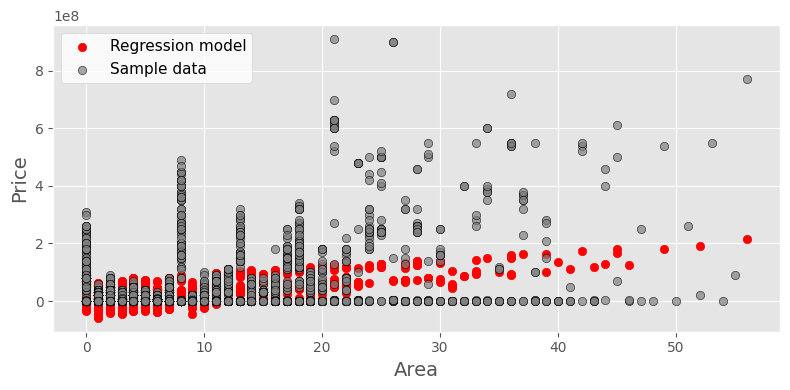

In [ ]:
import matplotlib.pyplot as plt
df=data.toPandas()
X=df["Area_index"]
y=df["Property_Price"]
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))
df2=lr_predictions.toPandas()
ax.scatter(df2["Area_index"], df2["prediction"], color='red', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Price', fontsize=14)
ax.set_xlabel('Area', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
fig.tight_layout()

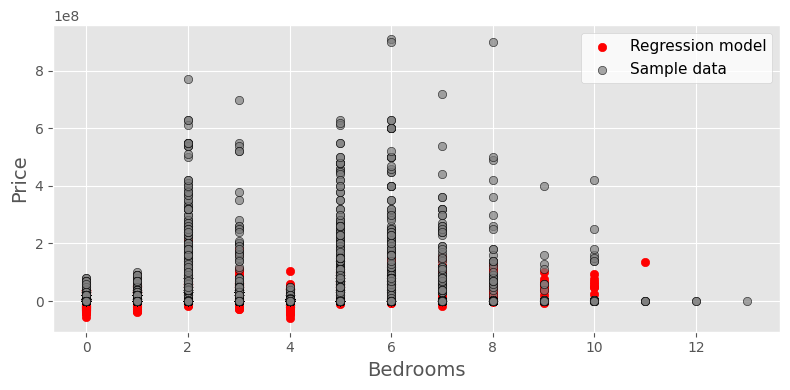

In [ ]:

fig, ax = plt.subplots(figsize=(8, 4))
df2=lr_predictions.toPandas()

ax.scatter(df2["Bedrooms_index"], df2["prediction"], color='red', label='Regression model')
ax.scatter(df["Bedrooms_index"], df["Property_Price"], edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Price', fontsize=14)
ax.set_xlabel('Bedrooms', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
fig.tight_layout()

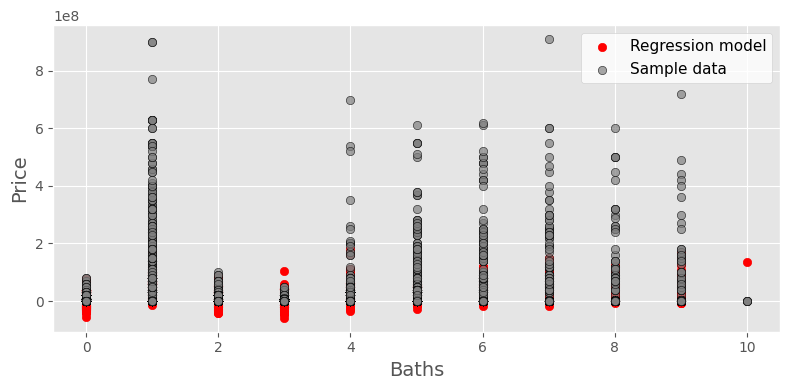

In [ ]:

fig, ax = plt.subplots(figsize=(8, 4))
df2=lr_predictions.toPandas()

ax.scatter(df2["Baths_index"], df2["prediction"], color='red', label='Regression model')
ax.scatter(df["Baths_index"], df["Property_Price"], edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Price', fontsize=14)
ax.set_xlabel('Baths', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
fig.tight_layout()

# 2nd Insight which location is most popular

In [ ]:
In2_RDD=spark.read.option('header','true').csv("data (2).csv",inferSchema=True)

In [ ]:
In2_RDD.show()

+---+-------------+--------------------+--------------+-----------------+--------------------+----+-----+----+---------+------------------+---------------+
|_c0| Properity ID|      Properity Name|Properity Type|Properity Purpose|  Properity Location|Area|Baths|Beds|     City|         Area Name|Properity Price|
+---+-------------+--------------------+--------------+-----------------+--------------------+----+-----+----+---------+------------------+---------------+
|  0|Flat 38149482|Diplomatic Apartm...|          Flat|         For Sale|Diplomatic Enclav...|   7|    2|   2|Islamabad|Diplomatic Enclave|       40000000|
|  1|Flat 37121915|Studio Apartment ...|          Flat|         For Sale|Top City 1, Islam...|   2|    1|   -|Islamabad|        Top City 1|        6400000|
|  2|Flat 37948454|Magnificent 2-bed...|          Flat|         For Sale|Blue Area, Islama...|   7|    3|   2|Islamabad|         Blue Area|       60000000|
|  3|Flat 38033067|Flat is available...|          Flat|         

In [ ]:
In2_RDD.createOrReplaceTempView("Housing_Data")
In2_RDD2 = spark.sql("SELECT Property_Location AS Property_Location , Property_Purpose AS Property_Purpose  from Housing_Data")
In2_RDD2.printSchema()
In2_RDD2.show()
type(In2_RDD2)

root
 |-- Property_Location: string (nullable = true)
 |-- Property_Purpose: string (nullable = true)

+--------------------+----------------+
|   Property_Location|Property_Purpose|
+--------------------+----------------+
|Diplomatic Enclav...|        For Sale|
|Blue Area, Islama...|        For Sale|
|G-15, Islamabad, ...|        For Sale|
|G-15, Islamabad, ...|        For Sale|
|Kashmir Highway, ...|        For Sale|
|E-11, Islamabad, ...|        For Sale|
|G-9, Islamabad, I...|        For Sale|
|Gulberg, Islamaba...|        For Sale|
|Gulberg, Islamaba...|        For Sale|
|DHA Defence, Isla...|        For Sale|
|GT Road, Islamaba...|        For Sale|
|B-17, Islamabad, ...|        For Sale|
|Gulberg, Islamaba...|        For Sale|
|B-17, Islamabad, ...|        For Sale|
|F-8, Islamabad, I...|        For Sale|
|E-11, Islamabad, ...|        For Sale|
|E-11, Islamabad, ...|        For Sale|
|E-11, Islamabad, ...|        For Sale|
|DHA Defence, Isla...|        For Sale|
|F-8, Islamabad, 

pyspark.sql.dataframe.DataFrame

In [ ]:
Location = In2_RDD2.select("Property_Location")
Location_Rent = In2_RDD2.filter(In2_RDD2["Property_Purpose"]=="For Rent")
Location_Sale = In2_RDD2.filter(In2_RDD2["Property_Purpose"]=="For Sale")

In [ ]:
Location.show()
Location_Rent.show()
Location_Sale.show()

+--------------------+
|   Property_Location|
+--------------------+
|Diplomatic Enclav...|
|Blue Area, Islama...|
|G-15, Islamabad, ...|
|G-15, Islamabad, ...|
|Kashmir Highway, ...|
|E-11, Islamabad, ...|
|G-9, Islamabad, I...|
|Gulberg, Islamaba...|
|Gulberg, Islamaba...|
|DHA Defence, Isla...|
|GT Road, Islamaba...|
|B-17, Islamabad, ...|
|Gulberg, Islamaba...|
|B-17, Islamabad, ...|
|F-8, Islamabad, I...|
|E-11, Islamabad, ...|
|E-11, Islamabad, ...|
|E-11, Islamabad, ...|
|DHA Defence, Isla...|
|F-8, Islamabad, I...|
+--------------------+
only showing top 20 rows

+--------------------+----------------+
|   Property_Location|Property_Purpose|
+--------------------+----------------+
|F-7, Islamabad, I...|        For Rent|
|DHA Defence, Isla...|        For Rent|
|E-7, Islamabad, I...|        For Rent|
|DHA Defence, Isla...|        For Rent|
|F-6, Islamabad, I...|        For Rent|
|Gulberg, Islamaba...|        For Rent|
|F-7, Islamabad, I...|        For Rent|
|F-7, Islamabad, I...|

In [ ]:
Location=Location.toPandas()
Location_Rent=Location_Rent.toPandas()
Location_Sale=Location_Sale.toPandas()

In [ ]:
n = 10
print(Location.value_counts()[:n].index.tolist())
print(Location_Rent.value_counts()[:n].index.tolist())
print(Location_Sale.value_counts()[:n].index.tolist())

[('DHA Defence, Islamabad, Islamabad Capital',), ('E-11, Islamabad, Islamabad Capital',), ('G-15, Islamabad, Islamabad Capital',), ('G-13, Islamabad, Islamabad Capital',), ('Bahria Town, Islamabad, Islamabad Capital',), ('F-8, Islamabad, Islamabad Capital',), ('F-11, Islamabad, Islamabad Capital',), ('F-7, Islamabad, Islamabad Capital',), ('Gulberg, Islamabad, Islamabad Capital',), ('F-6, Islamabad, Islamabad Capital',)]
[('E-11, Islamabad, Islamabad Capital', 'For Rent'), ('DHA Defence, Islamabad, Islamabad Capital', 'For Rent'), ('F-8, Islamabad, Islamabad Capital', 'For Rent'), ('F-7, Islamabad, Islamabad Capital', 'For Rent'), ('F-11, Islamabad, Islamabad Capital', 'For Rent'), ('F-6, Islamabad, Islamabad Capital', 'For Rent'), ('F-10, Islamabad, Islamabad Capital', 'For Rent'), ('G-13, Islamabad, Islamabad Capital', 'For Rent'), ('Bahria Town, Islamabad, Islamabad Capital', 'For Rent'), ('Gulberg, Islamabad, Islamabad Capital', 'For Rent')]
[('G-15, Islamabad, Islamabad Capital', 

## 3rd Insight. which property type is most demanding.

In [ ]:
In3_RDD=spark.read.option('header','true').csv("data (2) .csv",inferSchema=True)  

In [ ]:
In3_RDD.show()

+----------+-------------+--------------------+-------------+----------------+--------------------+----+-----+--------+---------+------------------+--------------+
|Unnamed: 0|  Property_ID|       Property_Name|Property_Type|Property_Purpose|   Property_Location|Area|Baths|Bedrooms|     City|         Area_Name|Property_Price|
+----------+-------------+--------------------+-------------+----------------+--------------------+----+-----+--------+---------+------------------+--------------+
|         0|Flat 38149482|Diplomatic Apartm...|         Flat|        For Sale|Diplomatic Enclav...|   7|    2|       2|Islamabad|Diplomatic Enclave|      40000000|
|         1|Flat 37121915|Studio Apartment ...|         Flat|        For Sale|Top City 1, Islam...|   2|    1|       -|Islamabad|        Top City 1|       6400000|
|         2|Flat 37948454|Magnificent 2-bed...|         Flat|        For Sale|Blue Area, Islama...|   7|    3|       2|Islamabad|         Blue Area|      60000000|
|         3|Flat

In [ ]:
In3_RDD.createOrReplaceTempView("Housing_Data")
In3_RDD2 = spark.sql("SELECT Property_Type AS Property_Type from Housing_Data")
In3_RDD2.printSchema()
In3_RDD2.show()


root
 |-- Property_Type: string (nullable = true)

+-------------+
|Property_Type|
+-------------+
|         Flat|
|         Flat|
|         Flat|
|         Flat|
|         Flat|
|         Flat|
|         Flat|
|         Flat|
|         Flat|
|         Flat|
|         Flat|
|         Flat|
|         Flat|
|         Flat|
|         Flat|
|         Flat|
|         Flat|
|         Flat|
|         Flat|
|         Flat|
+-------------+
only showing top 20 rows



In [ ]:
Pro_type=In3_RDD2.toPandas()

In [ ]:
print(Pro_type.value_counts()[:1].index.tolist())

[('House',)]


# 4th Insight comparison of colony

In [ ]:
In4_RDD=spark.read.option('header','true').csv("dataNew.csv",inferSchema=True)  

In [ ]:
In4_RDD.show()

+--------------+--------------------+-------------+----------------+--------------------+----+-----+--------+------------------+--------------+
|   Property_ID|       Property_Name|Property_Type|Property_Purpose|   Property_Location|Area|Baths|Bedrooms|         Area_Name|Property_Price|
+--------------+--------------------+-------------+----------------+--------------------+----+-----+--------+------------------+--------------+
|House 29068759|10 Marla Lavish H...|        House|        For Sale|Bahria Town, Laho...|  10|    6|       5|Bahria Town Lahore|      30000000|
| Flat 37105353|Semi Furnished Lu...|         Flat|        For Sale|Bahria Town, Laho...|   3|    1|       1|Bahria Town Lahore|       4000000|
|House 32719002|10 Marla House Fo...|        House|        For Sale|Bahria Town, Laho...|  10|    7|       5|Bahria Town Lahore|      30000000|
|House 36285812|25 Marla House In...|        House|        For Sale|Bahria Town, Laho...|  24|    7|       6|Bahria Town Lahore|      70

In [ ]:
In4_RDD.createOrReplaceTempView("Housing_Data")
In4_RDD2 = spark.sql("SELECT Area AS Area , Area_Name As Area_Name , Property_Price As Property_Price from Housing_Data")
In4_RDD2.printSchema()
In4_RDD2.show()


root
 |-- Area: integer (nullable = true)
 |-- Area_Name: string (nullable = true)
 |-- Property_Price: integer (nullable = true)

+----+------------------+--------------+
|Area|         Area_Name|Property_Price|
+----+------------------+--------------+
|  10|Bahria Town Lahore|      30000000|
|   3|Bahria Town Lahore|       4000000|
|  10|Bahria Town Lahore|      30000000|
|  24|Bahria Town Lahore|      70000000|
|   3|Bahria Town Lahore|       6500000|
|   3|Bahria Town Lahore|       5800000|
|   6|Bahria Town Lahore|      20000000|
|   5|Bahria Town Lahore|      20000000|
|   5|Bahria Town Lahore|      20000000|
|  10|Bahria Town Lahore|      30000000|
|  20|Bahria Town Lahore|      60000000|
|  20|Bahria Town Lahore|      50000000|
|   5|Bahria Town Lahore|      20000000|
|  10|Bahria Town Lahore|      40000000|
|  10|Bahria Town Lahore|      30000000|
|  10|Bahria Town Lahore|      30000000|
|   6|Bahria Town Lahore|      20000000|
|   3|Bahria Town Lahore|       5600000|
|   3|Ba

In [ ]:
Bahria_Rawalpindi = In4_RDD2.filter(In4_RDD2["Area_Name"]=="Bahria Town Rawalpindi")
Bahria_Lahore = In4_RDD2.filter(In4_RDD2["Area_Name"]=="Bahria Town Lahore")
Bahria_Karachi = In4_RDD2.filter(In4_RDD2["Area_Name"]=="Bahria Town Karachi")

In [ ]:
Bahria_Rawalpindi.show()
Bahria_Lahore.show()
Bahria_Karachi.show()

+----+--------------------+--------------+
|Area|           Area_Name|Property_Price|
+----+--------------------+--------------+
|   7|Bahria Town Rawal...|      30000000|
|  13|Bahria Town Rawal...|      30000000|
|  10|Bahria Town Rawal...|      50000000|
|  13|Bahria Town Rawal...|      30000000|
|   5|Bahria Town Rawal...|      20000000|
|  22|Bahria Town Rawal...|      70000000|
|  10|Bahria Town Rawal...|      50000000|
|   5|Bahria Town Rawal...|      20000000|
|   4|Bahria Town Rawal...|       7600000|
|   4|Bahria Town Rawal...|       7400000|
|  20|Bahria Town Rawal...|      80000000|
|  14|Bahria Town Rawal...|      50000000|
|   7|Bahria Town Rawal...|      20000000|
|   5|Bahria Town Rawal...|      20000000|
|   5|Bahria Town Rawal...|      20000000|
|   5|Bahria Town Rawal...|      20000000|
|  11|Bahria Town Rawal...|      40000000|
|  10|Bahria Town Rawal...|      40000000|
|  10|Bahria Town Rawal...|      40000000|
|  10|Bahria Town Rawal...|      40000000|
+----+-----

In [ ]:
from pyspark.sql.functions import col, avg, corr , when

In [ ]:
Avg_Rawalpindi =  Bahria_Rawalpindi.select(avg('Property_Price')).collect()
Avg_Lahore =  Bahria_Lahore.select(avg('Property_Price')).collect()
Avg_Karachi = Bahria_Karachi.select(avg('Property_Price')).collect()

In [ ]:
print("Avg_rate of property price in Rawalpindi", Avg_Rawalpindi ,"\n" ,"Avg_rate of property price in Lahore", Avg_Lahore ,"\n" , "Avg_rate of property price in Karahi",Avg_Karachi )
print("Most expensive place is Bahria Rawalpindi ", max(Avg_Rawalpindi,Avg_Lahore,Avg_Karachi))


Avg_rate of property price in Rawalpindi [Row(avg(Property_Price)=40102681.99233717)] 
 Avg_rate of property price in Lahore [Row(avg(Property_Price)=29843448.275862068)] 
 Avg_rate of property price in Karahi [Row(avg(Property_Price)=20634217.877094973)]
Most expensive place is Bahria Rawalpindi  [Row(avg(Property_Price)=40102681.99233717)]


5 marla rate in each bahria colony

In [ ]:
Rwp_Bahria_5 = Bahria_Rawalpindi.where(col('Area') == 5).select(col('Property_Price')).collect()
LHR_Bahria_5 = Bahria_Lahore.where(col('Area') == 5).select(col('Property_Price')).collect()
Kar_Bahria_5 = Bahria_Karachi.where(col('Area') == 5).select(col('Property_Price')).collect()
print("Rate of 5 marla area in Rawalpindi", Rwp_Bahria_5[0] ,"\n" ,"Rate of 5 marla area in Lahore", LHR_Bahria_5[0] ,"\n" , "Rate of 5 marla area in Karahi", Kar_Bahria_5[0] )

Rate of 5 marla area in Rawalpindi Row(Property_Price=20000000) 
 Rate of 5 marla area in Lahore Row(Property_Price=20000000) 
 Rate of 5 marla area in Karahi Row(Property_Price=7000000)


In [ ]:
Rwp_Bahria_5 = Bahria_Rawalpindi.select(Bahria_Rawalpindi[''])

# 5th Insight which property is most expensive.

In [ ]:
priceindex = In4_RDD.select("Property_Price").toPandas().idxmax()
priceindex

Property_Price    543
dtype: int64

In [ ]:
print(In4_RDD.select(['Property_ID','Property_Name','Property_Location',
                        'Property_Type','Area','Area_Name','Property_Price',
                        'Property_Purpose']).collect()[int(priceindex)])

Row(Property_ID='House 37616397', Property_Name='8 Kanal Fully Furnished Beautiful Bungalow For Sale In Excutive Lodges Bahria Town.', Property_Location='Bahria Town, Lahore, Punjab', Property_Type='House', Area=160, Area_Name='Bahria Town Lahore', Property_Price=280000000, Property_Purpose='For Sale')


#correlation of area with price

In [ ]:
print(" Correlation between Area and property price " , In4_RDD2.stat.corr("Area", "Property_Price"))

 Correlation between Area and property price  0.8883225347362679


# Visualization

# Z-score

Z-score is a parametric measure and it takes two parameters — mean and standard deviation.
Once you calculate these two parameters, finding the Z-score of a data point is easy.

I used an arbitrary threshold of 2, beyond which all data points are flagged as outliers.
The rule of thumb is to use 2, 2.5, 3 or 3.5 as threshold.


In [ ]:
from scipy import stats
refined_data = []

property_types=data2["Property_Type"].unique().tolist()

for property_type in property_types:
    property_type_df=data2[data2['Property_Type'].str.contains(property_type)]
    z = np.abs(stats.zscore(property_type_df['Property_Price']))
    property_type_df= property_type_df[(np.abs(stats.zscore(property_type_df['Property_Price'])) < 2)]
    refined_data.append(property_type_df)
refined_data = pd.concat(refined_data)



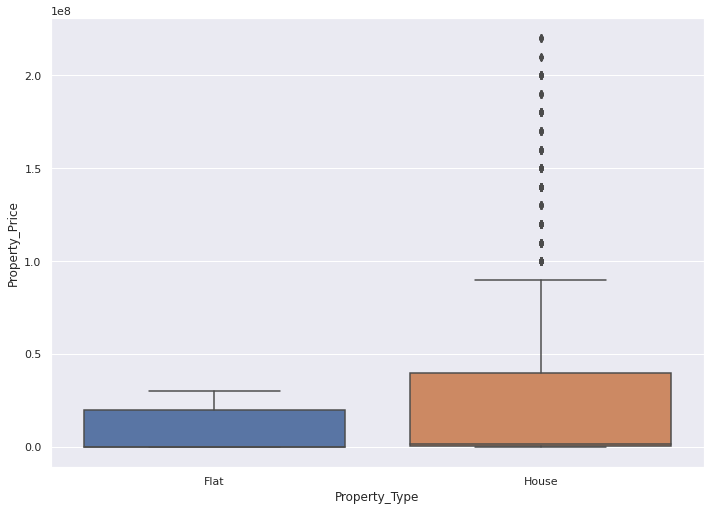

In [ ]:
ax = sns.boxplot(x="Property_Type", y="Property_Price", data=refined_data)

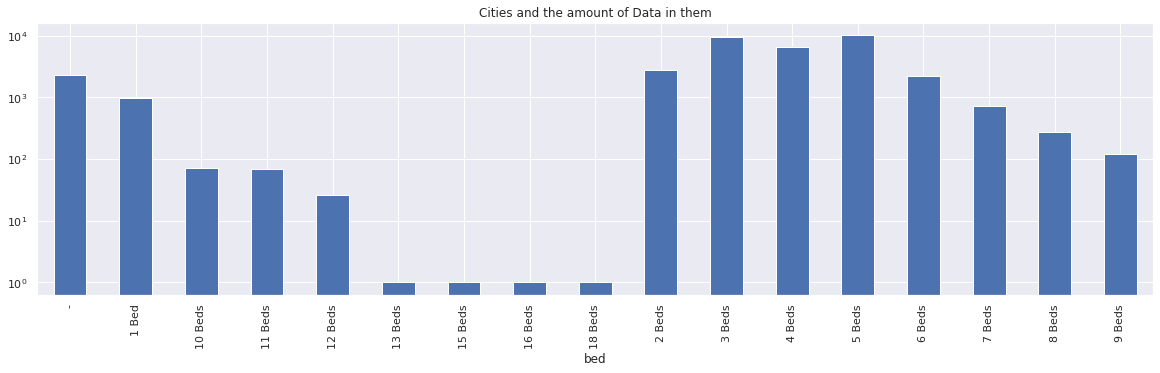

In [ ]:
df[df['city'].str.contains('Lahore')].groupby(["bed"] )['bed'].count().plot(kind="bar",figsize=(20, 5),logy=True,
                         title="Cities and the amount of Data in them")

## Data Normalaization
 Normalizing the right skewed SalePrice


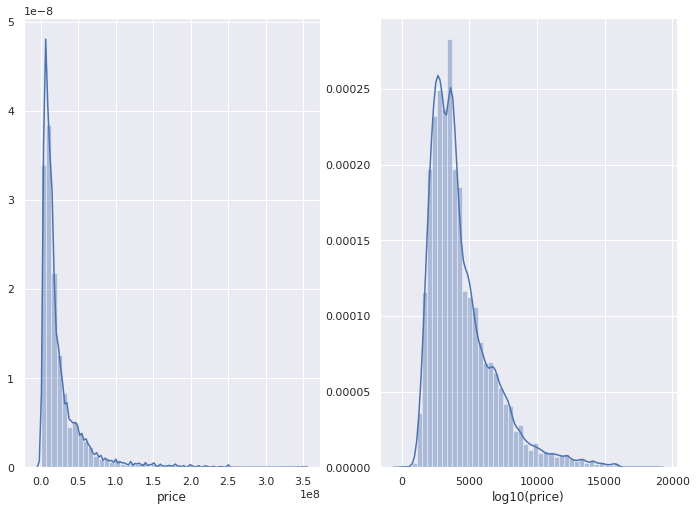

In [ ]:
fig, ax =plt.subplots(1,2)
sns.distplot(refined_data['price'], ax=ax[0])
sns.distplot(np.sqrt(refined_data['price']), ax=ax[1])
plt.xlabel('log10(price)')
fig.show()


In [ ]:
refined_data["log_price"]=np.round(np.sqrt(refined_data['price']), 3)

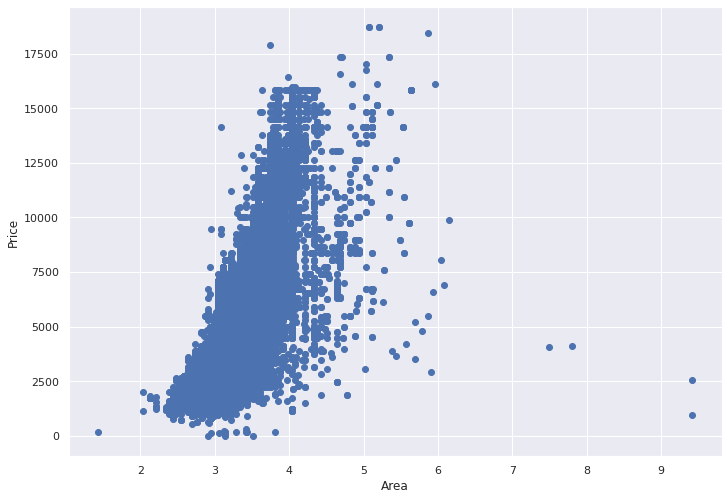

In [ ]:
plt.scatter(refined_data['log_area_sqfeet'], refined_data['log_price'])
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [ ]:
refined_data.drop(columns=['price','area_sqfeet'],inplace=True)


In [ ]:
harea_index_list = refined_data[refined_data['log_area_sqfeet'] > 7].index.tolist()
larea_index_list = refined_data[refined_data['log_area_sqfeet'] < 2].index.tolist()
price_index_list = refined_data[refined_data['log_price'] < 4].index.tolist()



refined_data.drop(harea_index_list, inplace=True)
refined_data.drop(larea_index_list, inplace=True)
refined_data.drop(price_index_list, inplace=True)




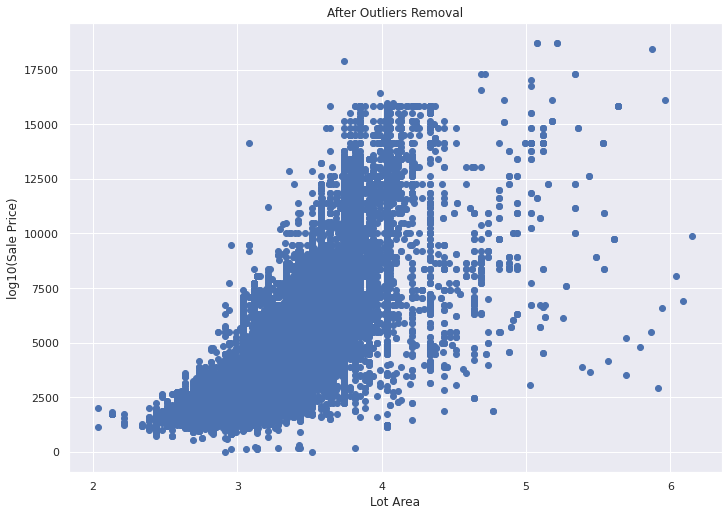

In [ ]:
# Again plottng the LotArea - SalePrice graph after the outlier removal

plt.scatter(refined_data["log_area_sqfeet"], refined_data["log_price"])
plt.title("After Outliers Removal")
plt.xlabel("Lot Area")
plt.ylabel("log10(Sale Price)")
plt.show()

## Remove Outliers from each property type

In [ ]:
extreme_outliers_data = []
for property_type in property_types:
    property_type_df=data2[data2['Property_Type'].str.contains(property_type)]
    z = np.abs(stats.zscore(property_type_df['Property_Price']))
    property_type_df= property_type_df[(np.abs(stats.zscore(property_type_df['Property_Price'])) > 2)]
    extreme_outliers_data.append(property_type_df)


In [ ]:

flat=extreme_outliers_data[1]
house=extreme_outliers_data[0]


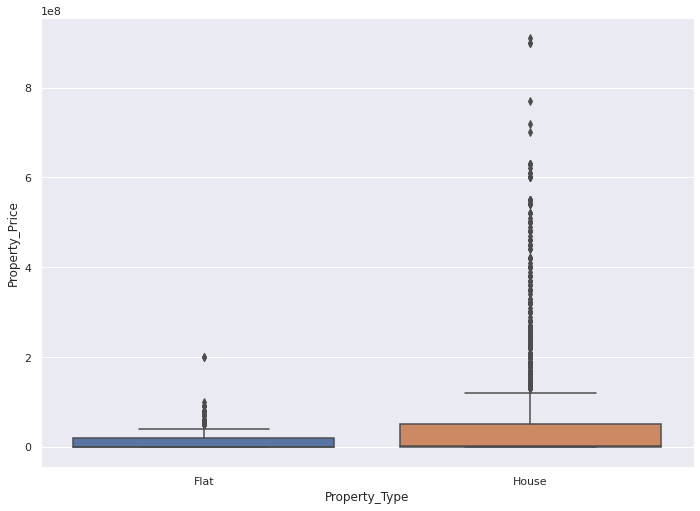

In [ ]:
ax = sns.boxplot(x="Property_Type", y="Property_Price", data=data2)

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib as plt
from math import sin, cos, sqrt, atan2, radians
import plotly.express as px
from scipy import stats
import ast


sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
data2.head()

,Unnamed: 0,Property_ID,Property_Name,Property_Type,Property_Purpose,Property_Location,Area,Baths,Bedrooms,City,Area_Name,Property_Price
0,0,Flat 38149482,Diplomatic Apartment For Sale,Flat,For Sale,"Diplomatic Enclave, Islamabad, Islamabad Capital",7,2,2,Islamabad,Diplomatic Enclave,40000000
1,2,Flat 37948454,Magnificent 2-bed Apartment For Sale In The Ma...,Flat,For Sale,"Blue Area, Islamabad, Islamabad Capital",7,3,2,Islamabad,Blue Area,60000000
2,3,Flat 38033067,Flat is available for sale,Flat,For Sale,"G-15, Islamabad, Islamabad Capital",17,4,4,Islamabad,G-15,30000000
3,4,Flat 38033355,Flat is available for sale,Flat,For Sale,"G-15, Islamabad, Islamabad Capital",3,1,1,Islamabad,G-15,6900000
4,5,Flat 37205259,3 Bedrooms Luxury Apartment Available For Sale...,Flat,For Sale,"Kashmir Highway, Islamabad, Islamabad Capital",10,4,3,Islamabad,Kashmir Highway,40000000


In [ ]:
city_comparison=df[df['area'].str.contains('1 Kanal1 Kanal|10 Marla|3 Marla3 Marla') & df['city'].str.contains("Lahore|Karachi|Islamabad|Rawalpindi")].groupby(["city","area"])['price'].median().to_frame('price').reset_index()
city_comparison.style.background_gradient(cmap='summer')


,city,area,price
0,Islamabad,1 Kanal1 Kanal,55000000
1,Islamabad,10 Marla10 Marla,27500000
2,Islamabad,3 Marla3 Marla,4000000
3,Karachi,1 Kanal1 Kanal,88000000
4,Karachi,10 Marla10 Marla,22000000
5,Karachi,3 Marla3 Marla,5000000
6,Lahore,1 Kanal1 Kanal,48500000
7,Lahore,10 Marla10 Marla,22500000
8,Lahore,3 Marla3 Marla,6000000
9,Rawalpindi,1 Kanal1 Kanal,37500000


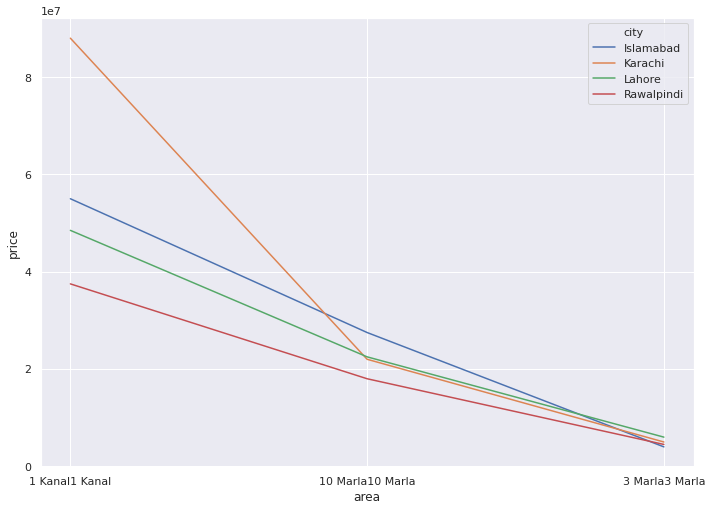

In [ ]:
sns.lineplot(data=city_comparison, x="area", y="price", hue="city")


## Insight 2 visualizations

Top 10 Locations in Pakistan

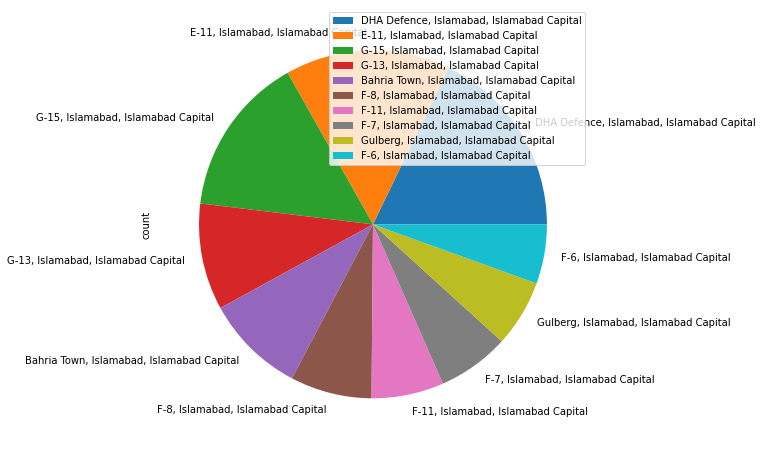

In [ ]:
top_10=data2.groupby(["Property_Location"])['Property_Location'].count().nlargest(10).to_frame('count').reset_index()
top_10.index=top_10["Property_Location"]
top_10.drop(columns=['Property_Location'],inplace=True)
top_10.plot.pie(y='count', figsize=(15, 8))

Top 10 Locations for Rent

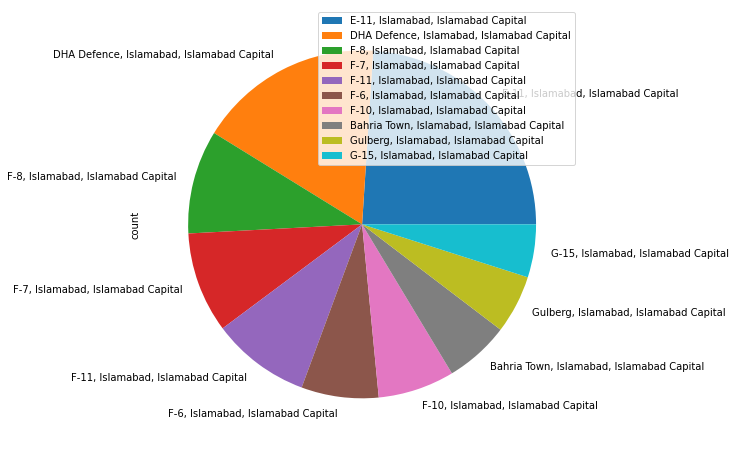

In [ ]:
top_10=Location_Rent.groupby(["Property_Location"])['Property_Location'].count().nlargest(10).to_frame('count').reset_index()
top_10.index=top_10["Property_Location"]
top_10.drop(columns=['Property_Location'],inplace=True)
top_10.plot.pie(y='count', figsize=(15, 8))

Top 10 Locations for sale

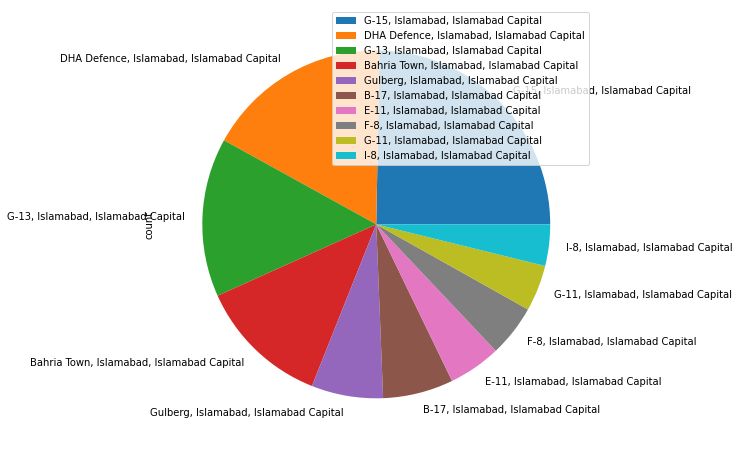

In [ ]:
top_10=Location_Sale.groupby(["Property_Location"])['Property_Location'].count().nlargest(10).to_frame('count').reset_index()
top_10.index=top_10["Property_Location"]
top_10.drop(columns=['Property_Location'],inplace=True)
top_10.plot.pie(y='count', figsize=(15, 8))

## Insight 4 Visualization

Which city's Bahria is more expensive

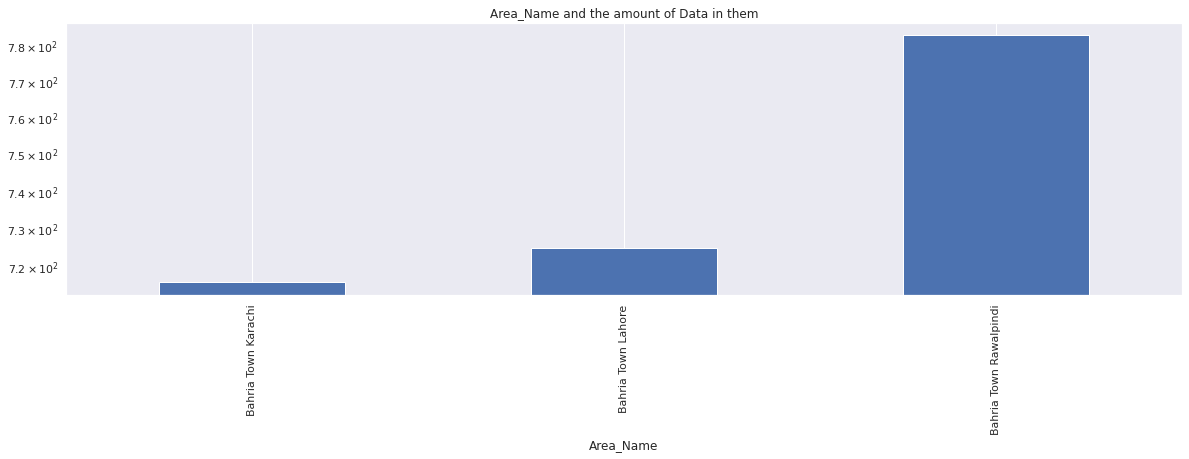

In [ ]:
data.groupby(["Area_Name"])['Area_Name'].count().plot(kind="bar",figsize=(20, 5),logy=True,
                         title="Area_Name and the amount of Data in them")

In [ ]:
data3 = pd.read_csv("dataNew.csv")
data3.head()

,Property_ID,Property_Name,Property_Type,Property_Purpose,Property_Location,Area,Baths,Bedrooms,Area_Name,Property_Price
0,House 29068759,10 Marla Lavish House For Sale In Sector C Bah...,House,For Sale,"Bahria Town, Lahore, Punjab",10,6,5,Bahria Town Lahore,30000000
1,Flat 37105353,Semi Furnished Luxury Apartment For Sale In Iq...,Flat,For Sale,"Bahria Town, Lahore, Punjab",3,1,1,Bahria Town Lahore,4000000
2,House 32719002,10 Marla House For Sale In Quaid Block Bahria ...,House,For Sale,"Bahria Town, Lahore, Punjab",10,7,5,Bahria Town Lahore,30000000
3,House 36285812,25 Marla House In Bahria Town Is Available For...,House,For Sale,"Bahria Town, Lahore, Punjab",24,7,6,Bahria Town Lahore,70000000
4,Flat 36421718,510 Square Feet Flat Is Available In Bahria Town,Flat,For Sale,"Bahria Town, Lahore, Punjab",3,1,1,Bahria Town Lahore,6500000


##correlation Heat map

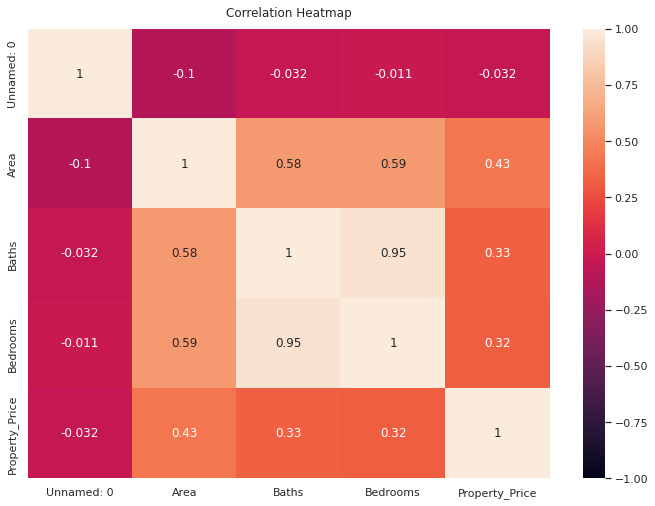

In [ ]:

heatmap = sns.heatmap(data2.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
